# **Libraries import**

In [2]:
import pandas as pd
from googletrans import Translator
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter
from transformers import AutoModelForSequenceClassification
from transformers import AutoTokenizer
import numpy as np
from scipy.special import softmax

c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# **Data Retrieval**

In [3]:
# read data
reviews_df=pd.read_csv('review6.csv')
df_products=pd.read_csv('items6.csv')

# **Review Preprocessing**

## Data Cleaning

In [46]:
reviews_df.head()

,id,item_id,review_time,variant,content
0,da15865b-2759-4224-aa8d-1345e5dcc028,c45db2cd-ab2a-4f38-be55-a29e528d7aaf,2023-02-17 06:21,"Variation: Beige,Adjustable Straps",Material:goodDurability:goodSemua cantik anak ...
1,8a95f8c1-3a96-4e80-95fd-9618168682af,c45db2cd-ab2a-4f38-be55-a29e528d7aaf,2022-12-02 11:19,"Variation: Beige,Adjustable Straps",Material:cotton i guessDurability:goodits adju...
2,f44382b8-f41c-483e-a2a6-49d39b93cf55,c45db2cd-ab2a-4f38-be55-a29e528d7aaf,2023-01-12 21:50,"Variation: Brown,Adjustable Straps","Material:cottonbarang sampai laju , dalam kead..."
3,3b063d08-debc-493b-a7d1-9e4f24776bd1,c45db2cd-ab2a-4f38-be55-a29e528d7aaf,2022-07-23 09:47,"Variation: Beige,Adjustable Straps","tada gmba but begnye cntik ya amat 😍 suke ii, ..."
4,45ab6808-2d30-485d-a374-d07cf233860a,c45db2cd-ab2a-4f38-be55-a29e528d7aaf,2023-03-19 20:13,"Variation: Beige,Adjustable Straps","Material:tebalDurability:okayorder semalam, sm..."


In [47]:
reviews_df.shape

(7302, 5)

In [49]:
reviews_df.dtypes

id             object
item_id        object
review_time    object
variant        object
content        object
dtype: object

In [7]:
reviews_df.isnull().sum()

id               0
item_id          0
review_time      0
variant          0
content        378
dtype: int64

In [50]:
reviews_df.duplicated(subset=reviews_df.columns.difference(['id'])).sum()

8

In [51]:
# remove duplicates
reviews_df = reviews_df[~reviews_df.duplicated(subset=reviews_df.columns.difference(['id']), keep='first')]

reviews_df.shape

(7294, 5)

In [52]:
# remove rows with null values

df_filtered = reviews_df[reviews_df['content'].notna()]
df_filtered.shape

(6924, 5)

In [53]:
# impute empty variants

df_filtered['variant'] = df_filtered['variant'].fillna("No variant")

C:\Users\Asus\AppData\Local\Temp\ipykernel_9996\1588346792.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['variant'] = df_filtered['variant'].fillna("No variant")


In [54]:
df_filtered.head()

,id,item_id,review_time,variant,content
0,da15865b-2759-4224-aa8d-1345e5dcc028,c45db2cd-ab2a-4f38-be55-a29e528d7aaf,2023-02-17 06:21,"Variation: Beige,Adjustable Straps",Material:goodDurability:goodSemua cantik anak ...
1,8a95f8c1-3a96-4e80-95fd-9618168682af,c45db2cd-ab2a-4f38-be55-a29e528d7aaf,2022-12-02 11:19,"Variation: Beige,Adjustable Straps",Material:cotton i guessDurability:goodits adju...
2,f44382b8-f41c-483e-a2a6-49d39b93cf55,c45db2cd-ab2a-4f38-be55-a29e528d7aaf,2023-01-12 21:50,"Variation: Brown,Adjustable Straps","Material:cottonbarang sampai laju , dalam kead..."
3,3b063d08-debc-493b-a7d1-9e4f24776bd1,c45db2cd-ab2a-4f38-be55-a29e528d7aaf,2022-07-23 09:47,"Variation: Beige,Adjustable Straps","tada gmba but begnye cntik ya amat 😍 suke ii, ..."
4,45ab6808-2d30-485d-a374-d07cf233860a,c45db2cd-ab2a-4f38-be55-a29e528d7aaf,2023-03-19 20:13,"Variation: Beige,Adjustable Straps","Material:tebalDurability:okayorder semalam, sm..."


## Translate and Clean String

In [57]:
# assign translator

tr= Translator()

# function to clean the strings and translate the content

def Clean(text_data):
    try:
        # Add spaces
        modified_text = text_data[0]

        for i in range(1, len(text_data)):
            if text_data[i].isupper() and not (text_data[i-1].isupper() or text_data[i-1].isspace()):
                modified_text += " " + text_data[i]
            else:
                modified_text += text_data[i]

        # translate
        translated_text = tr.translate(modified_text, src='ms', dest='en')
        print(translated_text.text)
        return translated_text.text
    except Exception as e:
        print(f"Translation error: {e}")
        return "Error: to be processed"

In [58]:
# run Clean() function

df_filtered['translated_text'] = df_filtered['content'].apply(Clean)

Material: Good Durability: Good All Beautiful Children.TQ Seller
Will repeat lg

#The picture is not here 😀
Material: cotton I guess Durability: Goodits adjustable and I like it 👍🏻🥰
Material: Cottonbarang to speed, in good condition as in the picture, very recommended
Tada gmba but begnye cntik ya very 😍 suke ii, who wants to buy je teros woi tkya was ii 😞kehkeh cumil😼
Material: thick durability: okayorder yesterday, today.There's a pocket in and zip.Recommended!
Material: Great Material Durability: Amazing nice color, I really love it!❤️
Material: xtebal fabric xnipis ... just nice suitable for durability: quick poster post .. tq seller😊 adjustable rope and zip
Material: Not Bad Durability: Good
Material: cun gilerdah until but not open ehehehe tgk review all words ok so i'm okay
The bag is soo prettyy, the color also same as the picture shown, the quality is not bad, can fit books, laptop and others, its worth to buy
Shopee ni nk write review of pom pom la me germ laaa eee i sincerel

C:\Users\Asus\AppData\Local\Temp\ipykernel_9996\4281706144.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['translated_text'] = df_filtered['content'].apply(Clean)


In [59]:
# run Clean() function to error values

df_filtered['translated_text'] = df_filtered.apply(lambda x: Clean(x['content']) if x['translated_text'] == 'Error: to be processed' else x['translated_text'], axis=1)

Material: Cotton Durability: Goodfast Delivery, Very Good Quality, Thankyou !!!
Thankyou seller ❤️ pretty bag comei 🥰 nnti bole repeat oder in this store 😊
Material: the cloth is really nice n smooth durability: Gooding person really take care of my parcel .. tq😚


C:\Users\Asus\AppData\Local\Temp\ipykernel_9996\3546745276.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['translated_text'] = df_filtered.apply(lambda x: Clean(x['content']) if x['translated_text'] == 'Error: to be processed' else x['translated_text'], axis=1)


In [60]:
df_filtered.head()

,id,item_id,review_time,variant,content,translated_text
0,da15865b-2759-4224-aa8d-1345e5dcc028,c45db2cd-ab2a-4f38-be55-a29e528d7aaf,2023-02-17 06:21,"Variation: Beige,Adjustable Straps",Material:goodDurability:goodSemua cantik anak ...,Material: Good Durability: Good All Beautiful ...
1,8a95f8c1-3a96-4e80-95fd-9618168682af,c45db2cd-ab2a-4f38-be55-a29e528d7aaf,2022-12-02 11:19,"Variation: Beige,Adjustable Straps",Material:cotton i guessDurability:goodits adju...,Material: cotton I guess Durability: Goodits a...
2,f44382b8-f41c-483e-a2a6-49d39b93cf55,c45db2cd-ab2a-4f38-be55-a29e528d7aaf,2023-01-12 21:50,"Variation: Brown,Adjustable Straps","Material:cottonbarang sampai laju , dalam kead...","Material: Cottonbarang to speed, in good condi..."
3,3b063d08-debc-493b-a7d1-9e4f24776bd1,c45db2cd-ab2a-4f38-be55-a29e528d7aaf,2022-07-23 09:47,"Variation: Beige,Adjustable Straps","tada gmba but begnye cntik ya amat 😍 suke ii, ...","Tada gmba but begnye cntik ya very 😍 suke ii, ..."
4,45ab6808-2d30-485d-a374-d07cf233860a,c45db2cd-ab2a-4f38-be55-a29e528d7aaf,2023-03-19 20:13,"Variation: Beige,Adjustable Straps","Material:tebalDurability:okayorder semalam, sm...",Material: thick durability: okayorder yesterda...


In [61]:
# delete review if error is shown

df_filtered = df_filtered[df_filtered['translated_text'] != 'Error: to be processed']

In [62]:
df_filtered.shape

(6924, 6)

In [63]:
# common unprocessed noises to be replaced

replacement_dict = {
    'tq': 'Thank you',
    'Tq': 'Thank you',
    'Tqsm': 'Thank you so much',
    'xde': 'do not have',
    ' x ': ' not ',
    'mcm': 'like',
    'barg': 'product',
    'brg': 'product',
    'barag': 'product',
    'je': '',
    'cntik': 'pretty',
    'cantek': 'pretty',
    'sgt':'very',
    'lmbt': 'slow'
}

df_filtered['translated_text'] = df_filtered['translated_text'].replace(replacement_dict, regex=True)

In [64]:
# remove all newline

df_filtered['translated_text'] = df_filtered['translated_text'].replace(r'\n', ' ', regex=True)

In [65]:
# Check null value

df_filtered.isnull().sum()

id                 0
item_id            0
review_time        0
variant            0
content            0
translated_text    0
dtype: int64

Arabic characters are contained in some reviews but mostly fillers, therefore rows containing it will be removed

In [66]:
# delete rows that contain arabic characters

df_filtered = df_filtered[~df_filtered['content'].str.contains('[\u0600-\u06FF\u0750-\u077F\u08A0-\u08FF\uFB50-\uFDCF\uFDF0-\uFDFF\uFE70-\uFEFF]')]

# **Sentiment Analysis**

In [67]:
df_filtered.head()

,id,item_id,review_time,variant,content,translated_text
0,da15865b-2759-4224-aa8d-1345e5dcc028,c45db2cd-ab2a-4f38-be55-a29e528d7aaf,2023-02-17 06:21,"Variation: Beige,Adjustable Straps",Material:goodDurability:goodSemua cantik anak ...,Material: Good Durability: Good All Beautiful ...
1,8a95f8c1-3a96-4e80-95fd-9618168682af,c45db2cd-ab2a-4f38-be55-a29e528d7aaf,2022-12-02 11:19,"Variation: Beige,Adjustable Straps",Material:cotton i guessDurability:goodits adju...,Material: cotton I guess Durability: Goodits a...
2,f44382b8-f41c-483e-a2a6-49d39b93cf55,c45db2cd-ab2a-4f38-be55-a29e528d7aaf,2023-01-12 21:50,"Variation: Brown,Adjustable Straps","Material:cottonbarang sampai laju , dalam kead...","Material: Cottonbarang to speed, in good condi..."
3,3b063d08-debc-493b-a7d1-9e4f24776bd1,c45db2cd-ab2a-4f38-be55-a29e528d7aaf,2022-07-23 09:47,"Variation: Beige,Adjustable Straps","tada gmba but begnye cntik ya amat 😍 suke ii, ...","Tada gmba but begnye pretty ya very 😍 suke ii,..."
4,45ab6808-2d30-485d-a374-d07cf233860a,c45db2cd-ab2a-4f38-be55-a29e528d7aaf,2023-03-19 20:13,"Variation: Beige,Adjustable Straps","Material:tebalDurability:okayorder semalam, sm...",Material: thick durability: okayorder yesterda...


In [68]:
# model declaration

roberta=f"cardiffnlp/twitter-xlm-roberta-base-sentiment"
tokenizer= AutoTokenizer.from_pretrained(roberta)
model=AutoModelForSequenceClassification.from_pretrained(roberta)

In [69]:
# function of encoding + sentiment analysis

def sentiment_analysis_bert(text):
    encoded=tokenizer(text,return_tensors='pt')

    result=model(**encoded)
    scores=result[0][0].detach().numpy()
    scores=softmax(scores)

    scores_dict={
    'Negative':scores[0],
    'Neutral':scores[1],
    'Positive':scores[2]
    }

    print(text + " done")
    return scores_dict

In [70]:
# set tokenizer specification

tokenizer.model_max_length = 512

In [71]:
# check shape
df_filtered.shape

(6919, 6)

In [72]:
# sentiment analysis
df_filtered['polarity_score'] = df_filtered['translated_text'].apply(sentiment_analysis_bert)

Material: Good Durability: Good All Beautiful Children.TQ Seller Will repeat lg  #The picture is not here 😀 done
Material: cotton I guess Durability: Goodits adjustable and I like it 👍🏻🥰 done
Material: Cottonbarang to speed, in good condition as in the picture, very recommended done
Tada gmba but begnye pretty ya very 😍 suke ii, who wants to buy  teros woi tkya was ii 😞kehkeh cumil😼 done
Material: thick durability: okayorder yesterday, today.There's a pocket in and zip.Recommended! done
Material: Great Material Durability: Amazing nice color, I really love it!❤️ done
Material: xtebal fabric xnipis ... just nice suitable for durability: quick poster post .. Thank you seller😊 adjustable rope and zip done
Material: Not Bad Durability: Good done
Material: cun gilerdah until but not open ehehehe tgk review all words ok so i'm okay done
The bag is soo prettyy, the color also same as the picture shown, the quality is not bad, can fit books, laptop and others, its worth to buy done
Shopee ni n

In [73]:
# determine sentiment

df_filtered['sentiment'] = df_filtered['polarity_score'].apply(lambda x: max(x, key=lambda key: x[key]))

In [74]:
# drop content column

df_filtered=df_filtered.drop(columns='content')

In [75]:
df_filtered.head()

,id,item_id,review_time,variant,translated_text,polarity_score,sentiment
0,da15865b-2759-4224-aa8d-1345e5dcc028,c45db2cd-ab2a-4f38-be55-a29e528d7aaf,2023-02-17 06:21,"Variation: Beige,Adjustable Straps",Material: Good Durability: Good All Beautiful ...,"{'Negative': 0.058931794, 'Neutral': 0.3947956...",Positive
1,8a95f8c1-3a96-4e80-95fd-9618168682af,c45db2cd-ab2a-4f38-be55-a29e528d7aaf,2022-12-02 11:19,"Variation: Beige,Adjustable Straps",Material: cotton I guess Durability: Goodits a...,"{'Negative': 0.01261417, 'Neutral': 0.14365321...",Positive
2,f44382b8-f41c-483e-a2a6-49d39b93cf55,c45db2cd-ab2a-4f38-be55-a29e528d7aaf,2023-01-12 21:50,"Variation: Brown,Adjustable Straps","Material: Cottonbarang to speed, in good condi...","{'Negative': 0.015957, 'Neutral': 0.17103387, ...",Positive
3,3b063d08-debc-493b-a7d1-9e4f24776bd1,c45db2cd-ab2a-4f38-be55-a29e528d7aaf,2022-07-23 09:47,"Variation: Beige,Adjustable Straps","Tada gmba but begnye pretty ya very 😍 suke ii,...","{'Negative': 0.22773951, 'Neutral': 0.28708893...",Positive
4,45ab6808-2d30-485d-a374-d07cf233860a,c45db2cd-ab2a-4f38-be55-a29e528d7aaf,2023-03-19 20:13,"Variation: Beige,Adjustable Straps",Material: thick durability: okayorder yesterda...,"{'Negative': 0.018432742, 'Neutral': 0.4578046...",Positive


## Calculate Polarity Score

In [76]:
# calculate accumulated polarity score
def Count_Score(dict):
    pos = float(dict['Positive'])
    neg = float(dict['Negative'])
    neu = float(dict['Neutral'])

    return (pos*2)+(neg*-2)+(neu*1)

In [77]:
# apply function

df_filtered['accu_polarity_score'] = df_filtered['polarity_score'].apply(Count_Score)

In [78]:
# change type to string to be inserted in mysql

df_filtered['accu_polarity_score']=df_filtered['accu_polarity_score'].astype(str)

In [79]:
# export as json
df_filtered.to_json('reviews6.json', orient='records')

# **Item Pre-processing**

Pre-process item files

In [105]:
df_products.head()

,id,name,ratings,ratings_num,sold,shop_name,url,description,price
0,c45db2cd-ab2a-4f38-be55-a29e528d7aaf,TSCfashion Large Capacity Tote Bag Women's New...,4.8,1.4k,3.7k,tscfashion.my,https://shopee.com.my/TSCfashion-Large-Capacit...,,RM10.50
1,34426087-982f-4f79-be1b-8f0dd833d72a,Japanese and Korean Cute Backpack Female Stude...,4.9,340,791,lifefine.my,https://shopee.com.my/Japanese-and-Korean-Cute...,👑 Welcome to my shop\n🚀 All products have been...,RM24.80 - RM26.80
2,5438d0e1-415c-47e7-83a5-1d721e3db31d,(11 Colors)💕 Multi-Function Travel Storage Bag...,4.8,765,3k,daylan2.my,https://shopee.com.my/(11-Colors)💕-Multi-Funct...,💕Welcome to【SOHOME.MY】\n💕Please remember to Fo...,RM2.80 - RM4.86
3,db943c9c-1a03-4ea0-ae61-ec30c8981f41,LANFY Fashion Fluffy Shoulder Bag Female Top-h...,4.8,1.2k,3.9k,lanfygoods.my,https://shopee.com.my/LANFY-Fashion-Fluffy-Sho...,------------------Welcome to Lanfygoods store-...,RM8.03
4,a4a355f7-e23e-4164-ad54-de046bfde566,7-color Felt tote Bag Strawberry Bear Bag High...,4.8,735,5.1k,charian.my,https://shopee.com.my/7-color-Felt-tote-Bag-St...,"{""field_list"":[{""type"":0,""value"":""🥳🥳Welcome To...",RM1.88 - RM9.88


In [106]:
df_products.shape

(61, 9)

In [107]:
# drop of any duplicates

df_products = df_products.drop_duplicates(subset=df.columns.difference(['id'])).reset_index(drop=True)

In [4]:
df_products.dtypes

id              object
name            object
ratings        float64
ratings_num     object
sold            object
shop_name       object
url             object
description     object
price           object
dtype: object

In [108]:
df_products.shape

(60, 9)

In [6]:
df_products.isnull().sum()

id             0
name           0
ratings        0
ratings_num    0
sold           0
shop_name      0
url            0
description    2
price          0
dtype: int64

In [109]:
# remove \n, emojis, and punctuation

def remove_emojis_and_punctuation(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r' ', text)
    text = re.sub('[' + string.punctuation + ']', '', text)
    return text

# Apply the function to remove emojis and punctuation
df_products['description'] = df_products['description'].apply(remove_emojis_and_punctuation)

df_products['description'] = df_products['description'].str.replace('\n', ' ')

df_products['name'] = df_products['name'].apply(remove_emojis_and_punctuation)

df_products['name'] = df_products['name'].str.replace('\n', ' ')

Convert string of sold and ratings to numerical

In [110]:
# Define the convert_string_to_int function
def convert_string_to_int(string):
    if 'k' in string:
        return int(float(string.replace('k', '')) * 1000)
    else:
        return int(string)

# Apply the function to 'sold' and 'ratings' columns
df_products['sold'] = df_products['sold'].apply(convert_string_to_int)
df_products['ratings_num'] = df_products['ratings_num'].apply(convert_string_to_int)


In [111]:
# Export to JSON
df_products.to_json('items6.json', orient='records')

# **Review Score Calculation of Items**

Each review's polarity score has been accumulated. Now, accumulated score will be averaged to be mapped into the item 

In [112]:

df_products=pd.read_json("items6.json")
df_reviews=pd.read_json("reviews6.json")

In [113]:
df_reviews.head()

,id,item_id,review_time,variant,translated_text,polarity_score,sentiment,accu_polarity_score
0,da15865b-2759-4224-aa8d-1345e5dcc028,c45db2cd-ab2a-4f38-be55-a29e528d7aaf,2023-02-17 06:21:00,"Variation: Beige,Adjustable Straps",Material: Good Durability: Good All Beautiful ...,"{'Negative': 0.058931794, 'Neutral': 0.3947956...",Positive,1.369477
1,8a95f8c1-3a96-4e80-95fd-9618168682af,c45db2cd-ab2a-4f38-be55-a29e528d7aaf,2022-12-02 11:19:00,"Variation: Beige,Adjustable Straps",Material: cotton I guess Durability: Goodits a...,"{'Negative': 0.0126141701, 'Neutral': 0.143653...",Positive,1.805890
2,f44382b8-f41c-483e-a2a6-49d39b93cf55,c45db2cd-ab2a-4f38-be55-a29e528d7aaf,2023-01-12 21:50:00,"Variation: Brown,Adjustable Straps","Material: Cottonbarang to speed, in good condi...","{'Negative': 0.015956999700000002, 'Neutral': ...",Positive,1.765138
3,3b063d08-debc-493b-a7d1-9e4f24776bd1,c45db2cd-ab2a-4f38-be55-a29e528d7aaf,2022-07-23 09:47:00,"Variation: Beige,Adjustable Straps","Tada gmba but begnye pretty ya very 😍 suke ii,...","{'Negative': 0.2277395129, 'Neutral': 0.287088...",Positive,0.801953
4,45ab6808-2d30-485d-a374-d07cf233860a,c45db2cd-ab2a-4f38-be55-a29e528d7aaf,2023-03-19 20:13:00,"Variation: Beige,Adjustable Straps",Material: thick durability: okayorder yesterda...,"{'Negative': 0.018432742000000002, 'Neutral': ...",Positive,1.468464


In [114]:
# group accu_polarity_score based on item_id and add it to items

df_grouped=df_reviews.groupby(['item_id'])['accu_polarity_score'].mean()
result_dict = df_grouped.to_dict()
result_dict

{'07c69062-55f5-40e7-af95-c8153afd45e7': 1.276157906651497,
 '0c049fbb-59e3-4946-9bfe-e148c11fd2d0': 1.3934191380434766,
 '0d119e3f-61e4-4e94-96f9-8cc24b39ec7d': 1.3465098460378535,
 '0e95675a-60a1-4f1a-a8ea-794f8cd33b47': 1.4235058576973565,
 '1700c195-985f-4442-8cda-e50b19c0ec1a': 1.2552073985197634,
 '1d27e0d2-969e-4904-8ad2-092e60e08e0a': 0.7877375120607515,
 '1df34df8-c691-400f-9dcd-7b4da15ea1dc': 1.1276366426925926,
 '1eebe59f-82a1-44a9-b3f6-2ec32edf0f91': 1.3448375902170766,
 '25ecd14f-2072-48ae-b3a0-eb81c6e9ffcc': 1.3677987884894935,
 '276194a3-d7c5-40b9-aa88-da061b38cdfa': 1.4069172613543726,
 '27a9c227-acb4-4e9e-8f82-de646d117fa3': 1.241626899941998,
 '2968d82b-9b45-47e5-b5cd-3edc7797a5cb': 1.3750656456220895,
 '2d7229e3-4507-48a9-89da-eec26c42ea54': 1.1618308359920455,
 '309371ef-7ffe-41d6-8b7c-697537a4d5ce': 1.3701763610821218,
 '34426087-982f-4f79-be1b-8f0dd833d72a': 1.2404430697539024,
 '35523fae-1844-4744-b47b-3462684577a6': 1.3256570793377855,
 '35de8924-01c4-498d-89ff-

In [115]:
# map score to item's id
df_products['accu_score'] = df_products['id'].map(result_dict)

In [116]:
df_products.head()

,id,name,ratings,ratings_num,sold,shop_name,url,description,price,accu_score
0,c45db2cd-ab2a-4f38-be55-a29e528d7aaf,TSCfashion Large Capacity Tote Bag Womens New ...,4.8,1400,3700,tscfashion.my,https://shopee.com.my/TSCfashion-Large-Capacit...,,RM10.50,1.224544
1,34426087-982f-4f79-be1b-8f0dd833d72a,Japanese and Korean Cute Backpack Female Stude...,4.9,340,791,lifefine.my,https://shopee.com.my/Japanese-and-Korean-Cute...,Welcome to my shop All products have been ...,RM24.80 - RM26.80,1.240443
2,5438d0e1-415c-47e7-83a5-1d721e3db31d,11 Colors MultiFunction Travel Storage BagCut...,4.8,765,3000,daylan2.my,https://shopee.com.my/(11-Colors)💕-Multi-Funct...,Welcome to【SOHOMEMY】 Please remember to Foll...,RM2.80 - RM4.86,1.391561
3,db943c9c-1a03-4ea0-ae61-ec30c8981f41,LANFY Fashion Fluffy Shoulder Bag Female Topha...,4.8,1200,3900,lanfygoods.my,https://shopee.com.my/LANFY-Fashion-Fluffy-Sho...,Welcome to Lanfygoods store Follow the store l...,RM8.03,1.223735
4,a4a355f7-e23e-4164-ad54-de046bfde566,7color Felt tote Bag Strawberry Bear Bag Highv...,4.8,735,5100,charian.my,https://shopee.com.my/7-color-Felt-tote-Bag-St...,fieldlisttype0value🥳🥳Welcome To RIOME BAG 🥳🥳\...,RM1.88 - RM9.88,1.213000


In [117]:
# change date format
df_reviews["review_time"] = pd.to_datetime(df_reviews["review_time"], format="%Y-%m-%d %H:%M:%S")

In [118]:
df_products.to_json("items6.json",orient="records")

# **Combine all files together and remove duplicates**

Since reviews and items are processed in batches, combine all processed files together

In [ ]:
# define to be combined files 

review_files = ['review1.json', 'review2.json', 'review3.json', 'review4.json', 'review5.json']
item_files = ['item1.json', 'item2.json', 'item3.json', 'item4.json', 'item5.json']

In [ ]:
def combine(json_files):
    dataframes=[]
    for file in json_files:
        # Load JSON file into a DataFrame
        df = pd.read_json(file)
        # Append DataFrame to the list
        dataframes.append(df)
    combined_df = pd.concat(dataframes, ignore_index=True)

    return combined_df

all_review_df=combine(review_files)
all_product_df=combine(item_files)


In [81]:
all_review_df=pd.read_json("reviews.json")
all_product_df=pd.read_json("product_original.json")

In [82]:
all_product_df.head()

,id,name,ratings,ratings_num,sold,shop_name,url,description,price,accu_score
0,20bcb1c5-1b2b-46e4-9586-db1fa0d7d371,NIKE Fashion TravelSchool Backpack Bag For Unisex,4.8,162,447,sunsuncps,https://shopee.com.my/NIKE-Fashion-Travel-Scho...,High quality Pre-order For Unisex Fashion Bag ...,RM38.00,1.061794
1,988bec91-c0a1-41e8-97b4-70e324843079,Wallet For Men PU Leather Card Holder Wallet R...,4.8,8100,17800,mtfashion2.my,https://shopee.com.my/Wallet-For-Men-PU-Leathe...,MTFASHION MALAYSIA READY STOCK Ship with...,RM9.96 - RM28.99,1.218403
2,27973f6a-ddc8-4546-a4d4-5458bffef04b,READY STOCK ❤️ Premium 914 Inch Laptop Bag Pou...,4.9,789,2000,junhomedecor,https://shopee.com.my/READY-STOCK-❤️-Premium-9...,Welcome to our fun little store All products a...,RM24.40 - RM26.40,1.359126
3,0c117e89-4ba7-49d4-8fe3-d2c6ea0dcfee,CS New Men Leather Messenger Bag Single Should...,4.9,934,1800,chooseset.my,https://shopee.com.my/CS-New-Men-Leather-Messe...,Welcome to chooseset • Here is some FYI fr...,RM36.80,1.314783
4,a3dd88b3-e6b2-441d-ae19-e0014ba1d3ad,Ready Stock Nike Backpack Bag Nike Unisex Air ...,4.8,788,2000,handbagmurah.,https://shopee.com.my/Ready-Stock-Nike-Backpac...,ALL READY STOCK MALAYSIA Local Sellers Malay...,RM26.90 - RM30.90,1.354279


Duplicates among different files might occur so need to be identified and removed

In [83]:
df_duplicates = all_product_df.duplicated(subset='name', keep=False)
print(df_duplicates.sum())

128


In [84]:
# Create an empty array to store the dropped 'id' values
dropped_ids = []

# Drop duplicates based on the 'name' column
df_filtered_product = all_product_df.drop_duplicates(subset='name', keep='first')

# Iterate over the original DataFrame to find the dropped 'id' values
for index, row in all_product_df.iterrows():
    if row['id'] not in df_filtered_product['id'].values:
        dropped_ids.append(row['id'])
# Display the dropped 'id' values
print(dropped_ids)

['fd645e16-5837-4367-9cda-7f8576ed5076', '244dad3f-1130-4150-80c5-c90f3a145fb7', '96f8312c-75e7-49ad-b422-4f28f09e1d87', '17cd6ccb-bc54-4978-8e38-809e75f46004', '963a32f9-da71-4156-a26c-94bc97e09a4e', '54b6316b-d8c9-463a-9e06-47a6dad27b67', '98d30df0-4f8f-42c0-9a91-ed044e93d0f8', '3f408cc8-bfdb-483c-bca3-46b2986b1790', 'f072e66b-91d7-4c97-a136-91aae331ed7f', '14e72421-a6c0-4faa-8e56-990b98c835c9', '34c373fe-dc60-4ffa-b2df-030499fde9a8', '819a4ce3-9b4f-435e-920c-7a3809be89af', '61d628f5-9f50-4445-b25c-1ec6cd60d184', 'e201a4bf-e51e-462a-ab02-1245401c6943', 'af6ec21f-0231-49b1-a263-8b281caf0408', 'b2b0e4c5-c9d9-4762-9d01-971724deb919', '3ae62b78-7445-4c55-8778-dc466ade15dc', '330e70bf-4f04-4ef1-85cb-27fdddf59761', 'ebde0c44-d6cb-4593-9b57-d3fe8bd26a12', 'a18e88e7-a553-4113-9441-867ab9293474', 'f6d02e4b-2dcf-4b7c-8cec-b979ef9c10e3', '999beb72-892b-4d39-946c-f93da8de74f1', '697610b2-4aa2-4a75-b8c3-092ffb9cb2da', 'ce1ba281-cabf-4693-a25c-9555082276a0', '219f2f1d-0a2c-4b6b-ac3e-68d3875e24de',

In [5]:
all_review_df=pd.read_json("all_reviews.json")
df_filtered_product=pd.read_json("all_items.json")

In [85]:
all_review_df = all_review_df[~all_review_df['item_id'].isin(dropped_ids)]

In [6]:
all_review_df.shape

(24613, 8)

In [7]:
df_filtered_product.shape

(232, 11)

In [88]:
# change data type to string to be uploaded to mysql

df_filtered_product['accu_score']=df_filtered_product['accu_score'].astype(str)
df_filtered_product['ratings']=df_filtered_product['ratings'].astype(str)
df_filtered_product['ratings_num']=df_filtered_product['ratings_num'].astype(str)
df_filtered_product['sold']=df_filtered_product['sold'].astype(str)
all_review_df['accu_polarity_score']=all_review_df['accu_polarity_score'].astype(str)

C:\Users\Asus\AppData\Local\Temp\ipykernel_9996\2922704208.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_product['accu_score']=df_filtered_product['accu_score'].astype(str)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9996\2922704208.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_product['ratings']=df_filtered_product['ratings'].astype(str)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9996\2922704208.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

In [ ]:
# Export to json
df_filtered_product.to_json("all_products.json",orient="records")
all_review_df.to_json("all_reviews.json",orient="records")

# Exploration

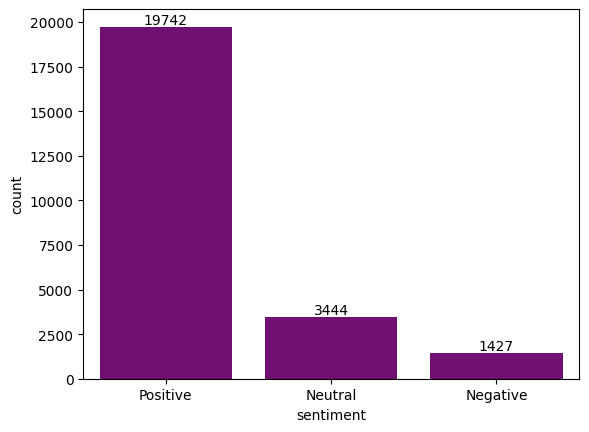

In [37]:
# View distribution

ax=sns.countplot(x=all_review_df["sentiment"], color="purple")
ax.bar_label(ax.containers[0])

plt.show()


In [9]:
# average word count

print(all_review_df["translated_text"].str.len().mean())
print(df_filtered_product["name"].str.len().mean())
print(df_filtered_product["description"].str.len().mean())

103.58001868931052
95.91379310344827
808.4181034482758


In [10]:
# max word count
print(all_review_df["translated_text"].str.len().max())
print(df_filtered_product["name"].str.len().max())
print(df_filtered_product["description"].str.len().max())

1400
249
2804


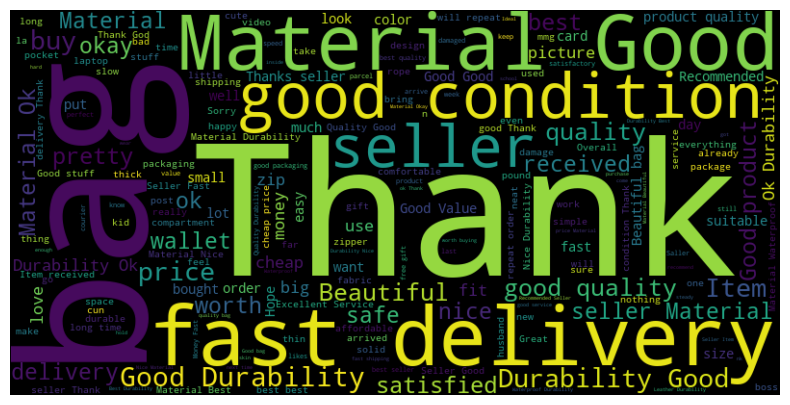

In [39]:


def word_cloud(df):
    # Combine all the strings in the 'text_column'
    all_text = ' '.join(df['translated_text'])

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400).generate(all_text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

word_cloud(all_review_df)

In [40]:
# Separate reviews

df_negative=all_review_df[all_review_df["sentiment"] == "Negative"]
df_positive=all_review_df[all_review_df["sentiment"] == "Positive"]
df_neutral=all_review_df[all_review_df["sentiment"] == "Neutral"]


In [41]:
print("Positive score mean: "+str(df_positive['accu_polarity_score'].mean()))
print("Negative score mean: "+str(df_negative['accu_polarity_score'].mean()))
print("Neutral score mean: "+str(df_neutral['accu_polarity_score'].mean()))

Positive score mean: 1.556775892133393
Negative score mean: -0.7983008482403607
Neutral score mean: 0.8031148412994454


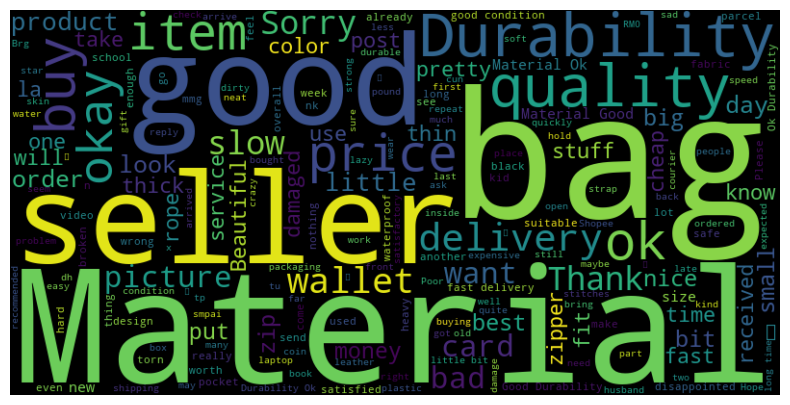

In [42]:
# word cloud of negative reviews

word_cloud(df_negative)

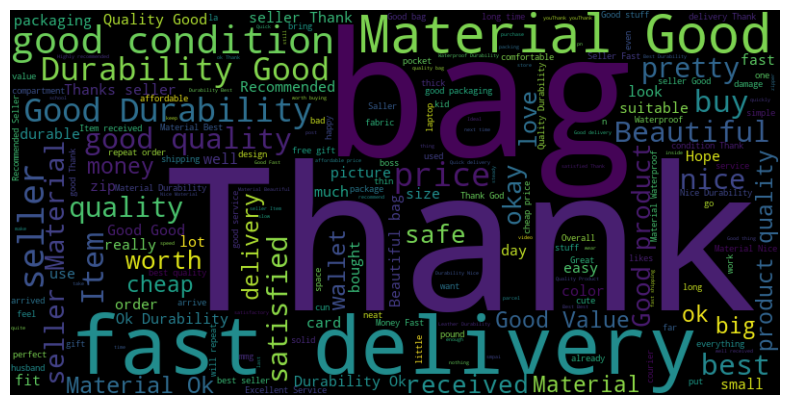

In [43]:
# word cloud of positive reviews

word_cloud(df_positive)

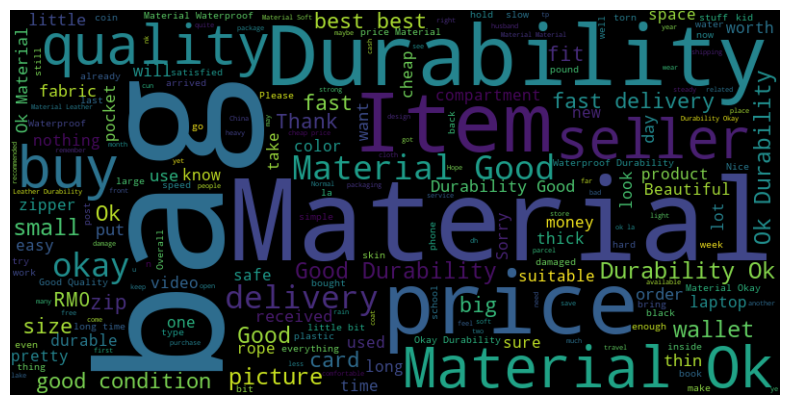

In [44]:
word_cloud(df_neutral)